In [ ]:
# menghubungkan colab dengan drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/MyDrive/ML/Praktikum/Praktikum2/"

In [ ]:
# membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + 'Data/500_Person_Gender_Height_Weight_Index.csv')
df

Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]

In [ ]:
# mencari info data pada file (tipe datanya, non nul count data, nama kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
# menghitung mean semua kolom numerik
df['Height'].mean()

np.float64(169.944)

In [ ]:
# menghitung median semua kolom numerik
df['Height'].median()

170.5

In [ ]:
# menghitung modus (hati-hati karena bisa lebih dari satu)
df['Height'].mode()

0    188
Name: Height, dtype: int64

In [ ]:
# menghitung variansi
df.var(numeric_only=True)

Height     268.149162
Weight    1048.633267
Index        1.836168
dtype: float64

In [ ]:
# menghitung standar deviasi
df.std(numeric_only=True)

Height    16.375261
Weight    32.382607
Index      1.355053
dtype: float64

In [ ]:
# hitung kuartil pertama(Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)

#Hitung kuartil ketiga (Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)

#Hitung IQR (Interquartile Range)
iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  156.0
Q3 :  184.0
IQR :  28.0


In [ ]:
# Untuk membuat statistika deskriptif pada type data int
df.describe()

Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

In [ ]:
#Menghiutng matriks korelasi untuk semua kolom numerik
correlation_matrix = df.corr(numeric_only=True)

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

Matriks Korelasi:
          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000


<Axes: >

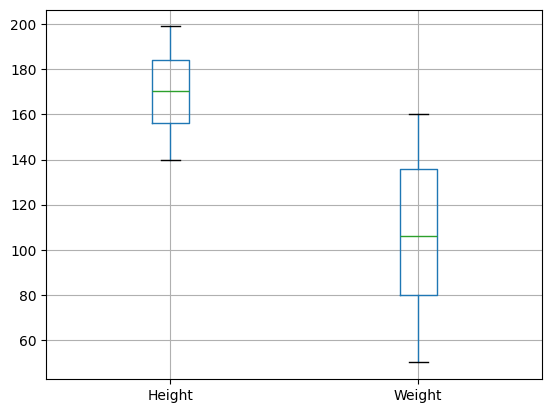

In [ ]:
# Visualisasi data
import pandas as pd
import numpy as np

df.boxplot(column=['Height', 'Weight'])

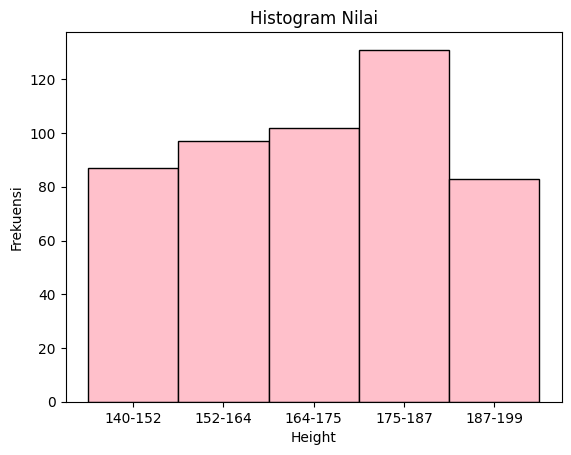

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Ambil data Height
data_height = df["Height"]

#Buat histogram
n, bins, patches = plt.hist(data_height, bins=5, color='pink', edgecolor="black")

#Tambahkan label
plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

#Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins [1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

#Tampilkan histogram.
plt.show()

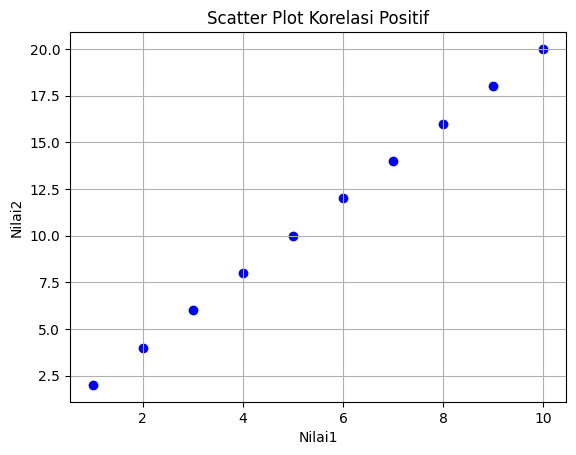

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Buat DataFrame contoh
data = {
  'Nilai1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'Nilai2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

df2 = pd.DataFrame(data)

#Buat scatter plot
plt.scatter(df2['Nilai1'], df2['Nilai2'], color='blue', marker='o')

#Tambahkan label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

#Tambahkan grid
plt.grid(True)

#Tampilkan plot
plt.show()

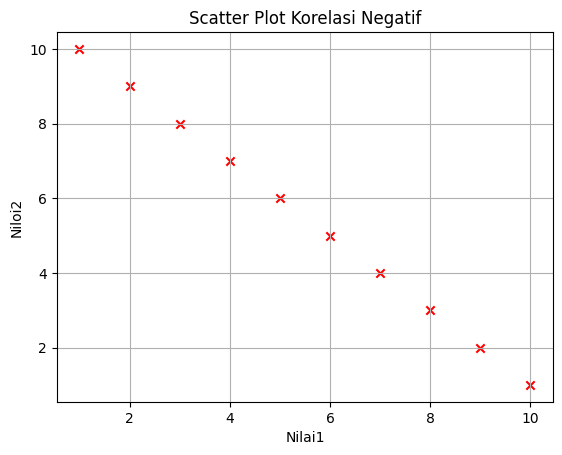

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Buat DataFrame contoh
data = {
  'Nilai1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'Nilai2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
}
df3 = pd.DataFrame(data)

#Buat scatter plot
plt.scatter(df3['Nilai1'], df3['Nilai2'], color="red", marker='x')

#Tambahkan label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Niloi2')

#Tambahkan grid
plt.grid(True)
#Tampilkan plot
plt.show()

TUGAS MANDIRI

In [ ]:
import pandas as pd

df = pd.read_csv(path + "Data/day.csv")

In [ ]:
# kolom diurutkan dalam format datetime (karena ditinjau dari data yang tersedia merupakan datanya berurutan waktu)
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

# menghitung jumlah data total
n = len(df)
train_size = int(0.8 * n)
test_size = n - train_size
val_size = int(0.1 * train_size)

# Data training
train_df = df.iloc [:train_size - val_size]
print("Jumlah Data Training: ", len(train_df))
display(train_df.head())
print("Range Tanggal Training: ", train_df["dteday"].min(), "->", train_df["dteday"].max())

Jumlah Data Training:  526


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Range Tanggal Training:  2011-01-01 00:00:00 -> 2012-06-09 00:00:00


In [ ]:
# Data Testing
test_df = df.iloc[train_size:]  # 20% terakhir dataset
print("\nJumlah Data Testing:", len(test_df))
display(test_df.head())  # tampilkan 5 baris pertama
print("Range Tanggal Testing:", test_df["dteday"].min(), "→", test_df["dteday"].max())


Jumlah Data Testing: 147


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
584      585 2012-08-07       3   1     8        0        2           1   
585      586 2012-08-08       3   1     8        0        3           1   
586      587 2012-08-09       3   1     8        0        4           1   
587      588 2012-08-10       3   1     8        0        5           1   
588      589 2012-08-11       3   1     8        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
584           2  0.735833  0.697621  0.703750   0.116908    1278        5995   
585           2  0.750000  0.707717  0.672917   0.110700    1263        6271   
586           1  0.755833  0.699508  0.620417   0.156100    1196        6090   
587           2  0.715833  0.667942  0.715833   0.238813    1065        4721   
588           2  0.692500  0.638267  0.732917   0.206479    2247        4052   

      cnt  
584  7273  
585  7534  
586  7286  
587  5786  
588  6299

Range Tanggal Testing: 2012-08-07 00:00:00 → 2012-12-31 00:00:00


In [ ]:
# Data Validation
val_df = df.iloc[train_size - val_size:train_size]  # 10% setelah training
print("\nJumlah Data Validation:", len(val_df))
display(val_df.head())  # tampilkan 5 baris pertama
print("Range Tanggal Validation:", val_df["dteday"].min(), "→", val_df["dteday"].max())


Jumlah Data Validation: 58


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
526      527 2012-06-10       2   1     6        0        0           0   
527      528 2012-06-11       2   1     6        0        1           1   
528      529 2012-06-12       2   1     6        0        2           1   
529      530 2012-06-13       2   1     6        0        3           1   
530      531 2012-06-14       2   1     6        0        4           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
526           1  0.726667  0.663517  0.538333   0.133721    2224        4374   
527           2  0.720833  0.659721  0.587917   0.207713    1017        5647   
528           2  0.653333  0.597875  0.833333   0.214546     477        4495   
529           1  0.655833  0.611117  0.582083   0.343279    1173        6248   
530           1  0.648333  0.624383  0.569583   0.253733    1180        6183   

      cnt  
526  6598  
527  6664  
528  4972  
529  7421  
530  7363

Range Tanggal Validation: 2012-06-10 00:00:00 → 2012-08-06 00:00:00
